<a href="https://colab.research.google.com/github/Vas1l1sa/SWW_ML_project_AI-aptamers/blob/main/03_%D0%9F%D0%BE%D0%B4%D0%B3%D0%BE%D1%82%D0%BE%D0%B2%D0%BA%D0%B0_%D0%B4%D0%B0%D1%82%D0%B0%D1%84%D1%80%D0%B5%D0%B9%D0%BC%D0%B0_%D0%BA_ML_(%D0%BE%D1%82%D0%B1%D0%BE%D1%80_%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D0%B2%2C_%D0%B8%D1%85_%D0%BD%D0%BE%D1%80%D0%BC%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D1%8F%2C_%D0%B1%D0%B0%D0%BB%D0%B0%D0%BD%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%BA%D0%B0%2C_%D0%B2%D1%8B%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0)_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# from PyBioMed import Pydna
# from rdkit import Chem
# from rdkit.ML.Descriptors import MoleculeDescriptors
# from rdkit.Chem import Descriptors
import sklearn
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SWW/аптамеры_df_descr.csv')
df

,aptamer,smiles,pKd,k2_descriptors_Kmer_1,k2_descriptors_Kmer_2,k2_descriptors_Kmer_3,k2_descriptors_Kmer_4,k2_descriptors_Kmer_5,k2_descriptors_Kmer_6,k2_descriptors_Kmer_7,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CCTGGGGGAGTATTGCGGAGGAAGG,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,6.798603,1,0,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,CTCAGTTCGGGACGACGGCAAGGTAACGTATGGGACCTTGGCACGA...,CN1COCN(CC2=CN=C(Cl)S2)\C1=N/[N+]([O-])=O,6.262569,3,5,3,1,3,3,6,...,0,0,0,0,0,1,0,0,0,0
2,TAGGGAAGAGAAGGACATATGATCTGCGTTTATCTCCGCTCGTTAA...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,6.970616,4,7,6,8,5,2,3,...,0,0,0,0,0,0,0,0,0,0
3,TAGGGAAGAGAAGGACATATGATGTCGCGCCAGCCTTCTGCGTTGA...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,6.478862,4,6,7,5,4,5,4,...,0,0,0,0,0,0,0,0,0,0
4,TAGGGAAGAGAAGGACATATGATAGTTTGAGACCTTTGCAGTCTTT...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,7.744727,5,8,9,6,7,2,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,ATACCAGCTTATTCAATTCAGGAAGACAACTCCGACTAGAATTGAT...,CC1([C@@H](N2[C@H](S1)[C@@H](C2=O)NC(=O)[C@@H]...,7.259637,10,4,8,10,6,2,3,...,1,0,0,0,0,0,0,0,0,2
422,TCCAGCACTCCACGCATAACGAATTGTGCTCAATGCGCCCCTGCAG...,C1=CC=C(C(=C1)C(C2=CC=C(C=C2)Cl)C(Cl)(Cl)Cl)Cl,6.384787,6,4,2,6,6,5,6,...,0,0,0,0,0,0,0,0,0,0
423,GCTGTGTGACTCCTGCAAACTACTGGTGTTCCTTGCCCTGTTTCAA...,C[C@@H]1C[C@@H]([C@@H]2[C@H](C[C@H]([C@@](O2)(...,7.248336,5,3,1,3,3,6,2,...,0,0,0,0,0,0,0,0,0,0
424,CGTTAGACG,CC1=CC(=NC(=N1)NS(=O)(=O)C2=CC=C(C=C2)N)C,7.609065,0,1,1,0,0,0,2,...,0,1,0,0,0,0,0,0,0,0


**Посмотрим на корреляцию между всеми числовыми колонками нашего датафрейма**

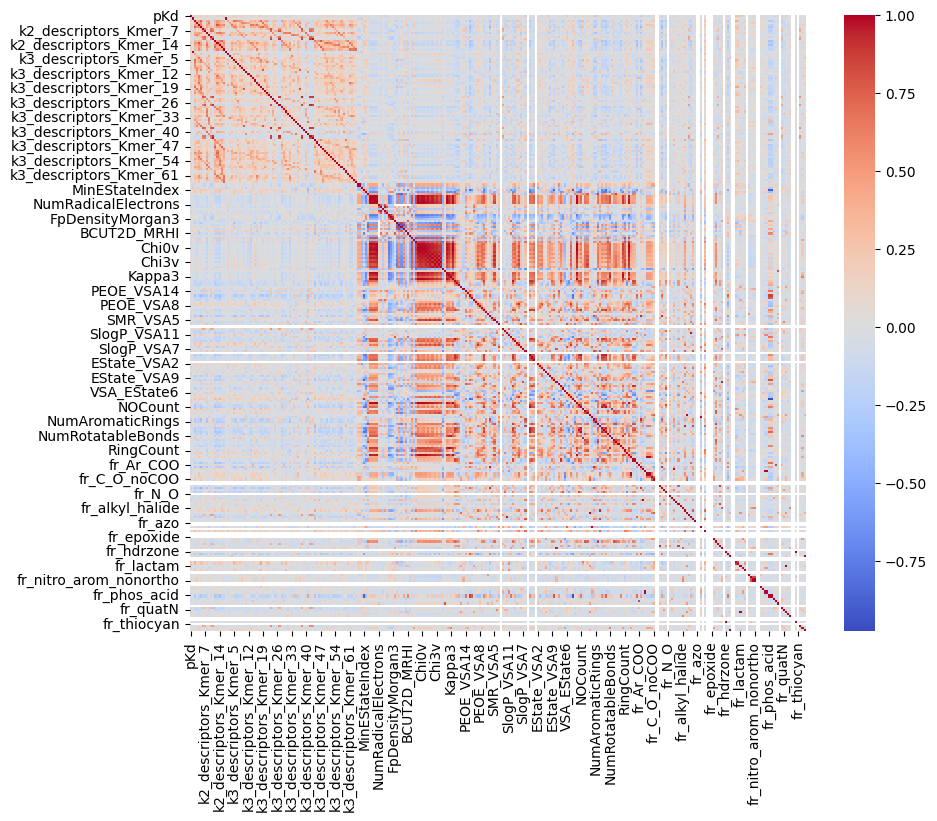

In [ ]:
df_Y = df[['aptamer', 'smiles']]
df_X = df.drop(columns=['aptamer', 'smiles'])

corr_matrix = df_X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', fmt='.2f', cbar=True, square=True)

plt.show()

**Отберем и оставим в датафрейме только те колонки, у которых:**
1. корреляция по модулю <= 0.8
2. дисперсия > 0.1

In [ ]:
corr_matrix = df_X.corr()
high_corr_var = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.8:
            colname = corr_matrix.columns[i]
            high_corr_var.add(colname)

df_X_cleaned = df_X.drop(columns=high_corr_var)

variances = df_X_cleaned.var()
df_filtered = df_X_cleaned.loc[:, variances[variances >= 0.1].index]
df_filtered

,pKd,k2_descriptors_Kmer_1,k2_descriptors_Kmer_2,k2_descriptors_Kmer_3,k2_descriptors_Kmer_4,k2_descriptors_Kmer_5,k2_descriptors_Kmer_6,k2_descriptors_Kmer_7,k2_descriptors_Kmer_8,k2_descriptors_Kmer_9,...,fr_Imine,fr_NH1,fr_Ndealkylation1,fr_alkyl_halide,fr_bicyclic,fr_ester,fr_imidazole,fr_ketone,fr_methoxy,fr_priamide
0,6.798603,1,0,3,1,0,1,1,1,3,...,0,0,0,0,1,0,1,0,0,0
1,6.262569,3,5,3,1,3,3,6,2,5,...,0,0,0,0,0,0,0,0,0,0
2,6.970616,4,7,6,8,5,2,3,7,9,...,0,0,0,0,5,0,0,1,0,0
3,6.478862,4,6,7,5,4,5,4,6,10,...,0,0,0,0,5,0,0,1,0,0
4,7.744727,5,8,9,6,7,2,1,4,11,...,0,0,0,0,5,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,7.259637,10,4,8,10,6,2,3,5,9,...,0,3,0,0,1,0,0,0,0,0
422,6.384787,6,4,2,6,6,5,6,3,5,...,0,0,0,3,0,0,0,0,0,0
423,7.248336,5,3,1,3,3,6,2,10,1,...,0,0,0,0,3,1,0,2,3,0
424,7.609065,0,1,1,0,0,0,2,0,1,...,0,1,0,0,0,0,0,0,0,0


**Подготовим датафрейм к нормализации - выделим признаки и отклик для будущей модели ML**

In [ ]:
df_filtered_Y = df_filtered['pKd']
df_filtered_X = df_filtered.drop(['pKd'], axis=1)

**Выполним нормализацию признаков**

In [ ]:
scaler = MinMaxScaler()
df_filtered_X_scaled = scaler.fit_transform(df_filtered_X)
df_filtered_X_scaled = pd.DataFrame(df_filtered_X_scaled, columns=df_filtered_X.columns)
df_filtered_X_scaled

,k2_descriptors_Kmer_1,k2_descriptors_Kmer_2,k2_descriptors_Kmer_3,k2_descriptors_Kmer_4,k2_descriptors_Kmer_5,k2_descriptors_Kmer_6,k2_descriptors_Kmer_7,k2_descriptors_Kmer_8,k2_descriptors_Kmer_9,k2_descriptors_Kmer_10,...,fr_Imine,fr_NH1,fr_Ndealkylation1,fr_alkyl_halide,fr_bicyclic,fr_ester,fr_imidazole,fr_ketone,fr_methoxy,fr_priamide
0,0.005025,0.000000,0.166667,0.076923,0.000000,0.027778,0.028571,0.083333,0.214286,0.027778,...,0.0,0.000,0.0,0.0,0.1,0.000000,1.0,0.000000,0.0,0.0
1,0.015075,0.454545,0.166667,0.076923,0.166667,0.083333,0.171429,0.166667,0.357143,0.055556,...,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.020101,0.636364,0.333333,0.615385,0.277778,0.055556,0.085714,0.583333,0.642857,0.083333,...,0.0,0.000,0.0,0.0,0.5,0.000000,0.0,0.333333,0.0,0.0
3,0.020101,0.545455,0.388889,0.384615,0.222222,0.138889,0.114286,0.500000,0.714286,0.138889,...,0.0,0.000,0.0,0.0,0.5,0.000000,0.0,0.333333,0.0,0.0
4,0.025126,0.727273,0.500000,0.461538,0.388889,0.055556,0.028571,0.333333,0.785714,0.027778,...,0.0,0.000,0.0,0.0,0.5,0.000000,0.0,0.333333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.050251,0.363636,0.444444,0.769231,0.333333,0.055556,0.085714,0.416667,0.642857,0.083333,...,0.0,0.375,0.0,0.0,0.1,0.000000,0.0,0.000000,0.0,0.0
422,0.030151,0.363636,0.111111,0.461538,0.333333,0.138889,0.171429,0.250000,0.357143,0.222222,...,0.0,0.000,0.0,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0
423,0.025126,0.272727,0.055556,0.230769,0.166667,0.166667,0.057143,0.833333,0.071429,0.166667,...,0.0,0.000,0.0,0.0,0.3,0.333333,0.0,0.666667,1.0,0.0
424,0.000000,0.090909,0.055556,0.000000,0.000000,0.000000,0.057143,0.000000,0.071429,0.000000,...,0.0,0.125,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


**Проверим, нет ли колонок с NaN-значениями**

In [ ]:
df_filtered_X_scaled.isna().any().sum()

3

Таким образом, в нашем датафрейме есть 3 столбца, в котором содержатся NaN-значения

**Заменим NaN-значения в колонках на среднее значение в этих колонках**

In [ ]:
for i in df_filtered_X_scaled.columns:
    df_filtered_X_scaled[i].fillna(df_filtered_X_scaled[i].mean(), inplace=True)
df_filtered_X_scaled

,k2_descriptors_Kmer_1,k2_descriptors_Kmer_2,k2_descriptors_Kmer_3,k2_descriptors_Kmer_4,k2_descriptors_Kmer_5,k2_descriptors_Kmer_6,k2_descriptors_Kmer_7,k2_descriptors_Kmer_8,k2_descriptors_Kmer_9,k2_descriptors_Kmer_10,...,fr_Imine,fr_NH1,fr_Ndealkylation1,fr_alkyl_halide,fr_bicyclic,fr_ester,fr_imidazole,fr_ketone,fr_methoxy,fr_priamide
0,0.005025,0.000000,0.166667,0.076923,0.000000,0.027778,0.028571,0.083333,0.214286,0.027778,...,0.0,0.000,0.0,0.0,0.1,0.000000,1.0,0.000000,0.0,0.0
1,0.015075,0.454545,0.166667,0.076923,0.166667,0.083333,0.171429,0.166667,0.357143,0.055556,...,0.0,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0
2,0.020101,0.636364,0.333333,0.615385,0.277778,0.055556,0.085714,0.583333,0.642857,0.083333,...,0.0,0.000,0.0,0.0,0.5,0.000000,0.0,0.333333,0.0,0.0
3,0.020101,0.545455,0.388889,0.384615,0.222222,0.138889,0.114286,0.500000,0.714286,0.138889,...,0.0,0.000,0.0,0.0,0.5,0.000000,0.0,0.333333,0.0,0.0
4,0.025126,0.727273,0.500000,0.461538,0.388889,0.055556,0.028571,0.333333,0.785714,0.027778,...,0.0,0.000,0.0,0.0,0.5,0.000000,0.0,0.333333,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.050251,0.363636,0.444444,0.769231,0.333333,0.055556,0.085714,0.416667,0.642857,0.083333,...,0.0,0.375,0.0,0.0,0.1,0.000000,0.0,0.000000,0.0,0.0
422,0.030151,0.363636,0.111111,0.461538,0.333333,0.138889,0.171429,0.250000,0.357143,0.222222,...,0.0,0.000,0.0,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0
423,0.025126,0.272727,0.055556,0.230769,0.166667,0.166667,0.057143,0.833333,0.071429,0.166667,...,0.0,0.000,0.0,0.0,0.3,0.333333,0.0,0.666667,1.0,0.0
424,0.000000,0.090909,0.055556,0.000000,0.000000,0.000000,0.057143,0.000000,0.071429,0.000000,...,0.0,0.125,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0


Проверка

In [ ]:
df_filtered_X_scaled.isna().any().sum()

0

**Объедим обратно нормализованные признаки и столбец с целевой переменной**

In [ ]:
df_filtered_scaled = pd.concat([df_filtered_X_scaled, df_filtered_Y], axis=1)
df_filtered_scaled

,k2_descriptors_Kmer_1,k2_descriptors_Kmer_2,k2_descriptors_Kmer_3,k2_descriptors_Kmer_4,k2_descriptors_Kmer_5,k2_descriptors_Kmer_6,k2_descriptors_Kmer_7,k2_descriptors_Kmer_8,k2_descriptors_Kmer_9,k2_descriptors_Kmer_10,...,fr_NH1,fr_Ndealkylation1,fr_alkyl_halide,fr_bicyclic,fr_ester,fr_imidazole,fr_ketone,fr_methoxy,fr_priamide,pKd
0,0.005025,0.000000,0.166667,0.076923,0.000000,0.027778,0.028571,0.083333,0.214286,0.027778,...,0.000,0.0,0.0,0.1,0.000000,1.0,0.000000,0.0,0.0,6.798603
1,0.015075,0.454545,0.166667,0.076923,0.166667,0.083333,0.171429,0.166667,0.357143,0.055556,...,0.000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,6.262569
2,0.020101,0.636364,0.333333,0.615385,0.277778,0.055556,0.085714,0.583333,0.642857,0.083333,...,0.000,0.0,0.0,0.5,0.000000,0.0,0.333333,0.0,0.0,6.970616
3,0.020101,0.545455,0.388889,0.384615,0.222222,0.138889,0.114286,0.500000,0.714286,0.138889,...,0.000,0.0,0.0,0.5,0.000000,0.0,0.333333,0.0,0.0,6.478862
4,0.025126,0.727273,0.500000,0.461538,0.388889,0.055556,0.028571,0.333333,0.785714,0.027778,...,0.000,0.0,0.0,0.5,0.000000,0.0,0.333333,0.0,0.0,7.744727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0.050251,0.363636,0.444444,0.769231,0.333333,0.055556,0.085714,0.416667,0.642857,0.083333,...,0.375,0.0,0.0,0.1,0.000000,0.0,0.000000,0.0,0.0,7.259637
422,0.030151,0.363636,0.111111,0.461538,0.333333,0.138889,0.171429,0.250000,0.357143,0.222222,...,0.000,0.0,1.0,0.0,0.000000,0.0,0.000000,0.0,0.0,6.384787
423,0.025126,0.272727,0.055556,0.230769,0.166667,0.166667,0.057143,0.833333,0.071429,0.166667,...,0.000,0.0,0.0,0.3,0.333333,0.0,0.666667,1.0,0.0,7.248336
424,0.000000,0.090909,0.055556,0.000000,0.000000,0.000000,0.057143,0.000000,0.071429,0.000000,...,0.125,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,7.609065


**Сохраним получившийся датафрейм**

In [ ]:
df_filtered_scaled.to_csv('/content/drive/MyDrive/SWW/аптамеры_нормализированные_признаки.csv', index=False)

Для удобства работы вернемся опять к обозначению датафрейма через df

In [ ]:
df_filtered_scaled = df
df.head()

,aptamer,smiles,pKd,k2_descriptors_Kmer_1,k2_descriptors_Kmer_2,k2_descriptors_Kmer_3,k2_descriptors_Kmer_4,k2_descriptors_Kmer_5,k2_descriptors_Kmer_6,k2_descriptors_Kmer_7,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CCTGGGGGAGTATTGCGGAGGAAGG,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,6.798603,1,0,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,CTCAGTTCGGGACGACGGCAAGGTAACGTATGGGACCTTGGCACGA...,CN1COCN(CC2=CN=C(Cl)S2)\C1=N/[N+]([O-])=O,6.262569,3,5,3,1,3,3,6,...,0,0,0,0,0,1,0,0,0,0
2,TAGGGAAGAGAAGGACATATGATCTGCGTTTATCTCCGCTCGTTAA...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,6.970616,4,7,6,8,5,2,3,...,0,0,0,0,0,0,0,0,0,0
3,TAGGGAAGAGAAGGACATATGATGTCGCGCCAGCCTTCTGCGTTGA...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,6.478862,4,6,7,5,4,5,4,...,0,0,0,0,0,0,0,0,0,0
4,TAGGGAAGAGAAGGACATATGATAGTTTGAGACCTTTGCAGTCTTT...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,7.744727,5,8,9,6,7,2,1,...,0,0,0,0,0,0,0,0,0,0


**Создаем новый столбец 'bind', который будет нашим откликом для задачи бинарной классификации. В этом столбце 1 означает, что связывание произошло (pKd >= 6), а 0 означает, что связывания нет (pKd < 6).**

In [ ]:
df['bind'] = np.where(df['pKd'] >= 6, 1, 0)

In [ ]:
df.head()

,aptamer,smiles,pKd,k2_descriptors_Kmer_1,k2_descriptors_Kmer_2,k2_descriptors_Kmer_3,k2_descriptors_Kmer_4,k2_descriptors_Kmer_5,k2_descriptors_Kmer_6,k2_descriptors_Kmer_7,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,bind
0,CCTGGGGGAGTATTGCGGAGGAAGG,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,6.798603,1,0,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,CTCAGTTCGGGACGACGGCAAGGTAACGTATGGGACCTTGGCACGA...,CN1COCN(CC2=CN=C(Cl)S2)\C1=N/[N+]([O-])=O,6.262569,3,5,3,1,3,3,6,...,0,0,0,0,1,0,0,0,0,1
2,TAGGGAAGAGAAGGACATATGATCTGCGTTTATCTCCGCTCGTTAA...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,6.970616,4,7,6,8,5,2,3,...,0,0,0,0,0,0,0,0,0,1
3,TAGGGAAGAGAAGGACATATGATGTCGCGCCAGCCTTCTGCGTTGA...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,6.478862,4,6,7,5,4,5,4,...,0,0,0,0,0,0,0,0,0,1
4,TAGGGAAGAGAAGGACATATGATAGTTTGAGACCTTTGCAGTCTTT...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,7.744727,5,8,9,6,7,2,1,...,0,0,0,0,0,0,0,0,0,1


**Теперь нужно посмотреть, насколько наш датафрейм уравновешен по кол-ву 1 и 0**

In [ ]:
df['bind'].value_counts()

,count
bind,
1,263
0,163


Как мы видим, данных по успешному связыванию (1) в датафрейме почти в 2 раза больше, чем по неуспешному (0). Такой перекос в данных в дальнейшем негативно повлияет на работу модели ML, поэтому датасет необходимо уравновесить по кол-ву строк с 1 и 0.

**Удалим из датафрейма 100 строк с успешным связыванием (1)**

Будем отбирать строки с успешным связыванием (1), которые наиболее хорошо отражают среднестатистическую пару аптамер-антибиотик из этого датасета. Для этого будем ориентироваться на квартили, т.к. такой отбор данных позволяет удалить выбросы и получить более репрезентативную выборку. Отбор строк будем производить на основании значения колонки 'pKd', которая является численной характеристикой меры связывания.


In [ ]:
df.head()

,aptamer,smiles,pKd,k2_descriptors_Kmer_1,k2_descriptors_Kmer_2,k2_descriptors_Kmer_3,k2_descriptors_Kmer_4,k2_descriptors_Kmer_5,k2_descriptors_Kmer_6,k2_descriptors_Kmer_7,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,bind
0,CCTGGGGGAGTATTGCGGAGGAAGG,Nc1ncnc2c1ncn2[C@@H]1O[C@H](COP(=O)(O)OP(=O)(O...,6.798603,1,0,3,1,0,1,1,...,0,0,0,0,0,0,0,0,0,1
1,CTCAGTTCGGGACGACGGCAAGGTAACGTATGGGACCTTGGCACGA...,CN1COCN(CC2=CN=C(Cl)S2)\C1=N/[N+]([O-])=O,6.262569,3,5,3,1,3,3,6,...,0,0,0,0,1,0,0,0,0,1
2,TAGGGAAGAGAAGGACATATGATCTGCGTTTATCTCCGCTCGTTAA...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,6.970616,4,7,6,8,5,2,3,...,0,0,0,0,0,0,0,0,0,1
3,TAGGGAAGAGAAGGACATATGATGTCGCGCCAGCCTTCTGCGTTGA...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,6.478862,4,6,7,5,4,5,4,...,0,0,0,0,0,0,0,0,0,1
4,TAGGGAAGAGAAGGACATATGATAGTTTGAGACCTTTGCAGTCTTT...,C[C@]12CC[C@H]3[C@@H](CCC4=CC(=O)CC[C@@]43C)[C...,7.744727,5,8,9,6,7,2,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
#напишем функцию для уменьшения кол-ва строк с успешным связыванием

def remove_outliers(df, column, value):
  df_selected = df[df[column] == value]
  Q1 = df_selected['pKd'].quantile(0.25)
  Q3 = df_selected['pKd'].quantile(0.75)
  IQR = Q3 - Q1

  #границы на основе IQR
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  #убираем выбросы
  df_selected = df_selected[(df_selected['pKd'] >= lower_bound) & (df_selected['pKd'] <= upper_bound)]
  return df_selected

df_filtered_by_1 = remove_outliers(df, 'bind', 1)

len(df_filtered_by_1)

261

**Как мы видим, это не особо помогло - данные уже довольно однородные, а строк все еще очень много. Чтобы все же уменьшить кол-во строк и уравновесить датасеты, рандомно возьмем 163 строки после выполнения функции remove_outliers()**


Почему берем строки именно рандомным образом?


Выбор строк рандомным образом сильно снижает временные затраты и по качеству не сильно уступает циклу по написанной выше функции remove_outliers() или новой функции, каждый раз уменьшающей порог с помощью изменяемого `factor` (lower_bound = Q1 - factor * IQR, upper_bound = Q3 + factor * IQR), т.к. основные выбросы были уже отфильтрованы функцией remove_outliers().



In [ ]:
#возьмем рандомным образом 163 стоки
df_filtered_by_1 = df_filtered_by_1.sample(n=163, random_state=42)
df_filtered_by_1.reset_index(drop=True, inplace=True)
len(df_filtered_by_1)

163

**Создадим новый уравновешенный датафрейм**

In [ ]:
df_balanced = pd.concat([df[df['bind'] == 0], df_filtered_by_1])
df_balanced.reset_index(drop=True, inplace=True)
df_balanced.groupby('bind', as_index=False).size()

,bind,size
0,0,163
1,1,163


In [ ]:
df_balanced.head()

,aptamer,smiles,pKd,k2_descriptors_Kmer_1,k2_descriptors_Kmer_2,k2_descriptors_Kmer_3,k2_descriptors_Kmer_4,k2_descriptors_Kmer_5,k2_descriptors_Kmer_6,k2_descriptors_Kmer_7,...,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,bind
0,GTGGAGGCGGTGGCCGTGGAGGCGGAGGCCGC,OCC(O)C1OC(=O)C(=C1O)O,5.539102,0,0,3,0,0,2,4,...,0,0,0,0,0,0,0,0,0,0
1,ACCAGCACATTCGATTATACCAGCTTATTCAATTCACAGCTATGTC...,C(CS)[C@@H](C(=O)O)N,5.221849,2,5,4,9,9,4,1,...,0,0,0,0,0,0,0,0,0,0
2,GTGGAAAGCCGAATGTGATTAGGGACCAGTGGAGAAGTAGTACGGA...,C(CS)[C@@H](C(=O)O)N,4.920819,4,4,6,2,1,3,4,...,0,0,0,0,0,0,0,0,0,0
3,CGACGCCAGTTTGAAGGTTCGTTCGCAGGTGTGGAGTGACGTCG,C1=CC(=C(C=C1CCN)O)O,4.568636,1,2,4,0,2,1,6,...,0,0,0,0,0,0,0,0,0,0
4,GTCTCTGTGTGCGCCAGAGACACTGGGGCAGATATGGGCCAGCACA...,C1=CC(=C(C=C1CCN)O)O,4.795880,1,3,6,3,6,4,1,...,0,0,0,0,0,0,0,0,0,0


**Посмотрим, нет ли в нашем датафрейме NaN-значений**

In [ ]:
df_balanced.isna().any().sum()

8

**Посмотрим, где содержатся эти NaN-значения**

In [ ]:
#колонки, в которых содержится хотя бы 1 NaN-знаечние
df_balanced_nan_values = df_balanced.loc[:, df_balanced.isna().any()]
nan_columns = df_balanced_nan_values.columns
nan_columns

Index(['BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO',
       'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW'],
      dtype='object')

In [ ]:
df_balanced_nan_values[df_balanced_nan_values.isna(axis=1).any()]

TypeError: DataFrame.isna() got an unexpected keyword argument 'axis'

In [ ]:
df_balanced['BCUT2D_MRLOW'].isna().sum()

11

Нужно удалить либо эти колонки, либо строки - нужно посмотреть отдельно на строки с нан значениями и эти колонки

**Столбец 'pKd' нам больше не нужен, удалим его**

In [ ]:
df_balanced = df_balanced.drop(['pKd'], axis=1)

**Сохраним получившийся датафрейм**

In [ ]:
df_balanced.to_csv('/content/drive/MyDrive/SWW/аптамеры_df_ML.csv', index=False)